# Project 2 [Data Visualization] on the same dataset of IPL

 ## 1. Top 10 Run Scorer

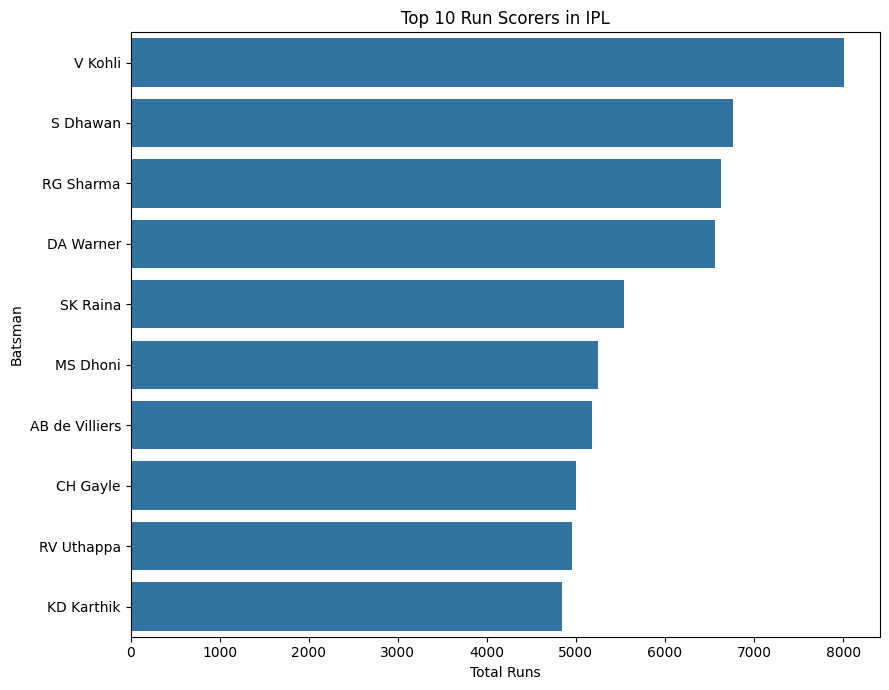

In [15]:
import pandas as pd

# Load matches and deliveries datasets
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9,7))
sns.barplot(data=top10, x='batsman_runs', y='batter')
plt.title("Top 10 Run Scorers in IPL")
plt.xlabel("Total Runs")
plt.ylabel("Batsman")
plt.tight_layout()
plt.show()


## 2. Top 10 six Hitters in IPL

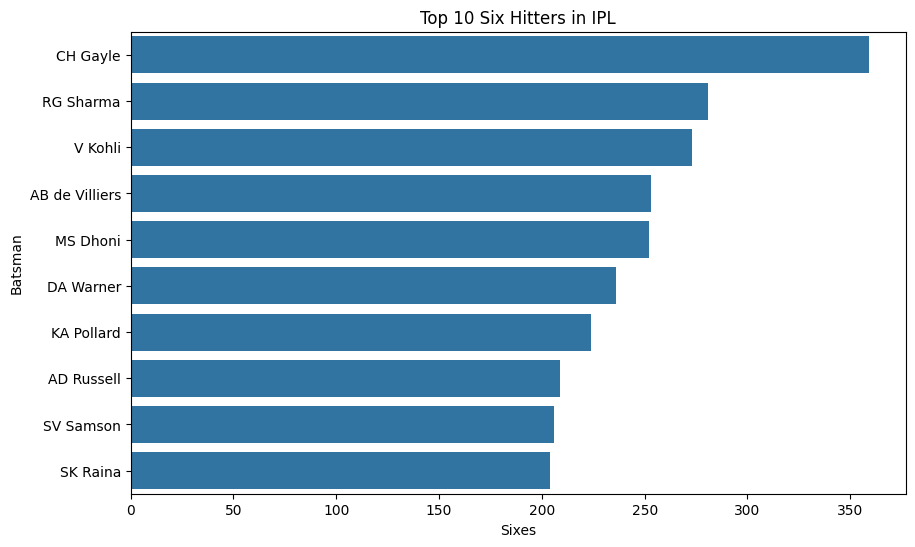

In [31]:
sixes = deliveries[deliveries['batsman_runs'] == 6]
sixes_count = sixes['batter'].value_counts().reset_index().head(10)
sixes_count.columns = ['Batsman', 'Sixes']

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=sixes_count, x='Sixes', y='Batsman')
plt.title("Top 10 Six Hitters in IPL")
plt.show()


## 3. Toss Decisions (Bat v/s Field)

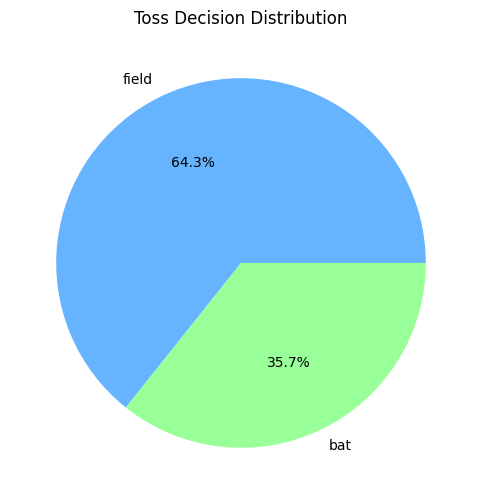

In [18]:
toss_decisions = matches['toss_decision'].value_counts()

# Plot
plt.figure(figsize=(6,6))
plt.pie(toss_decisions, labels=toss_decisions.index, autopct='%1.1f%%', colors=['#66b3ff','#99ff99'])
plt.title("Toss Decision Distribution")
plt.show()


## 4. Top Runs Scorer Each Season

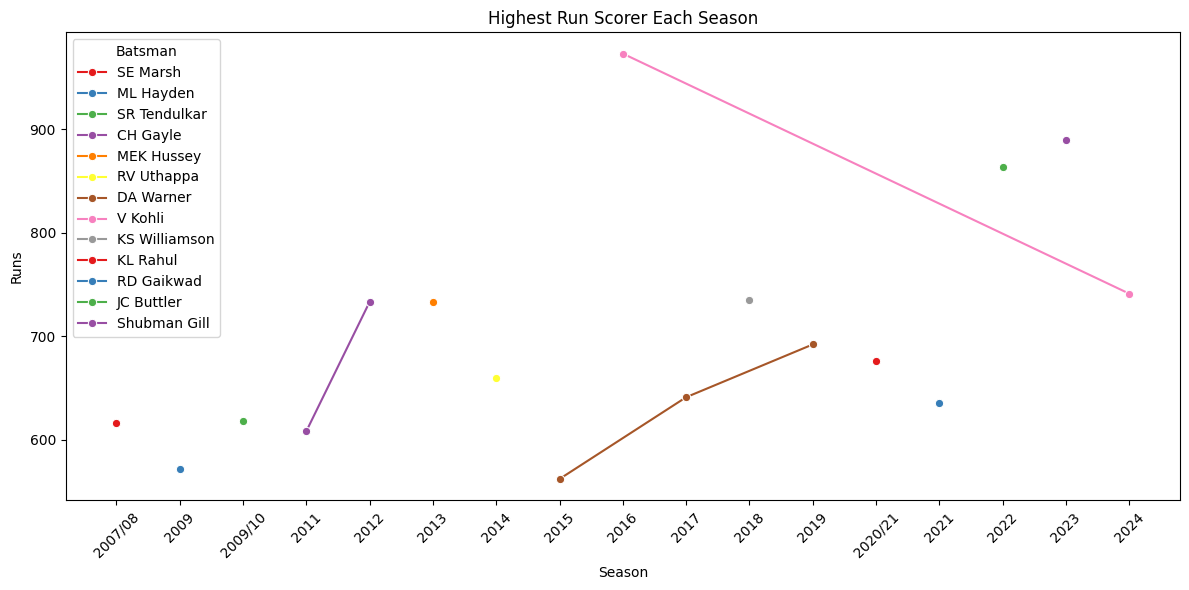

In [35]:
merged = deliveries.merge(matches[['id', 'season']], left_on='match_id', right_on='id')
season_runs = merged.groupby(['season', 'batter'])['batsman_runs'].sum().reset_index()
top_scorers = season_runs.sort_values(['season', 'batsman_runs'], ascending=[True, False]) \
                         .drop_duplicates(subset='season', keep='first')

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=top_scorers, x='season', y='batsman_runs', marker='o', hue='batter', palette='Set1')
plt.title("Highest Run Scorer Each Season")
plt.ylabel("Runs")
plt.xlabel("Season")
plt.xticks(rotation=45)
plt.legend(title="Batsman", loc='best')
plt.tight_layout()
plt.show()


## 5. Most Matches Won By  Teams

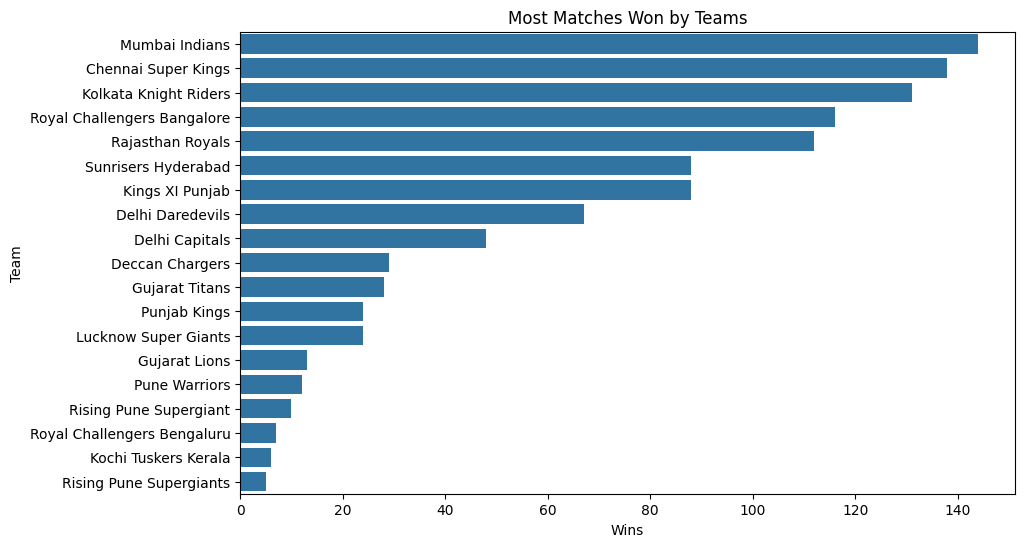

In [30]:
team_wins = matches['winner'].value_counts().reset_index()
team_wins.columns = ['Team', 'Wins']

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=team_wins, x='Wins', y='Team')
plt.title("Most Matches Won by Teams")
plt.show()


## 6. Top Runs Score Per Season

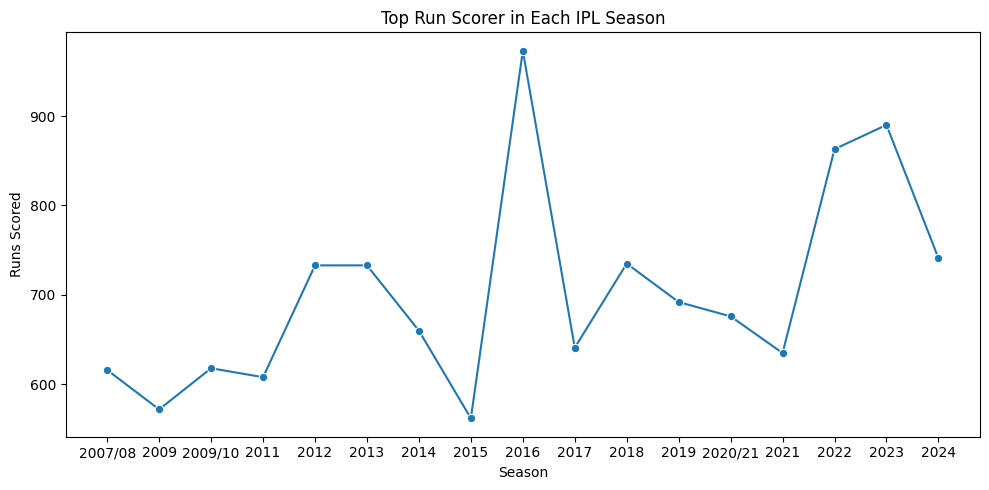

In [20]:
# Merge to get season info
merged = deliveries.merge(matches[['id', 'season']], left_on='match_id', right_on='id')

# Get total runs by batter per season
season_runs = merged.groupby(['season', 'batter'])['batsman_runs'].sum().reset_index()

# Top scorer per season
top_scorers = season_runs.sort_values(['season', 'batsman_runs'], ascending=[True, False]).drop_duplicates('season')

# Plot line graph
plt.figure(figsize=(10,5))
sns.lineplot(data=top_scorers, x='season', y='batsman_runs', marker='o')
plt.title("Top Run Scorer in Each IPL Season")
plt.xlabel("Season")
plt.ylabel("Runs Scored")
plt.tight_layout()
plt.show()


## 7. Matches Played By Each Team Per Season

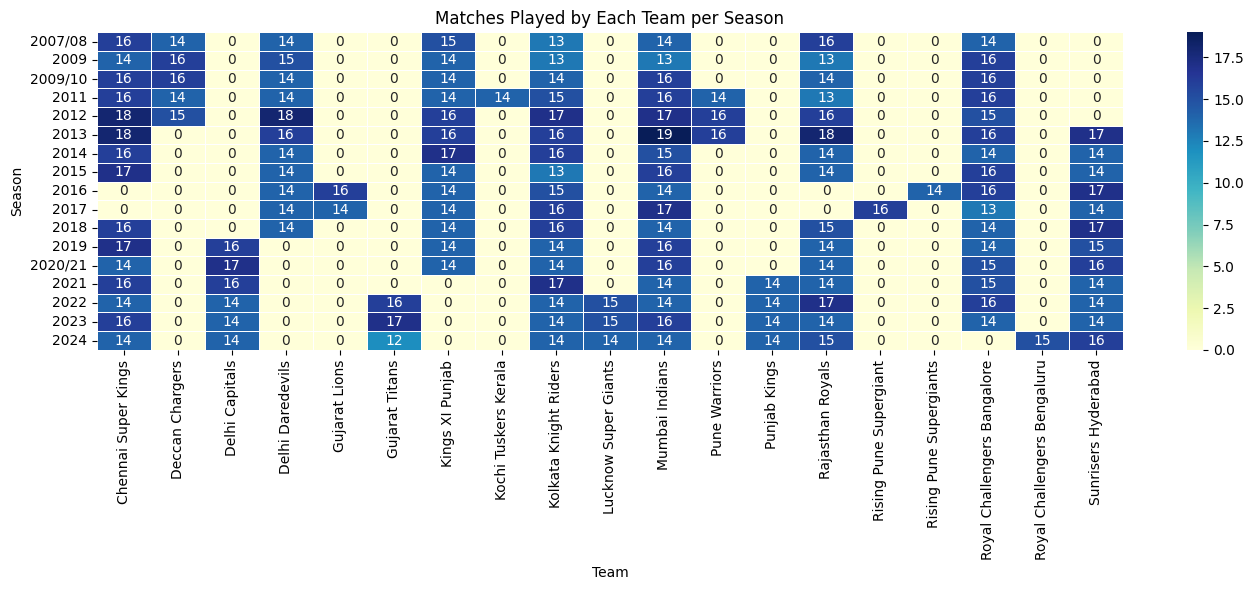

In [7]:
# Count matches played per team per season
team_season = matches.melt(id_vars=['season'], value_vars=['team1', 'team2'], var_name='Team_Type', value_name='Team')
team_season_count = team_season.groupby(['season', 'Team']).size().unstack().fillna(0)

# Plot heatmap
plt.figure(figsize=(14,6))
sns.heatmap(team_season_count, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title("Matches Played by Each Team per Season")
plt.xlabel("Team")
plt.ylabel("Season")
plt.tight_layout()
plt.show()


# This is my Project 2 [Data visualization] 

## - Aryan Narula 

#### Linkedin link -: www.linkedin.com/in/aryan-narula-856158327

#### Github link -: https://github.com/Aryannarula01